In [1]:
import seaborn as sns
import pandas as pd

In [3]:
diamonds = sns.load_dataset('diamonds')
print(diamonds.dtypes)
print(diamonds.head())

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
import matplotlib.pyplot as plt

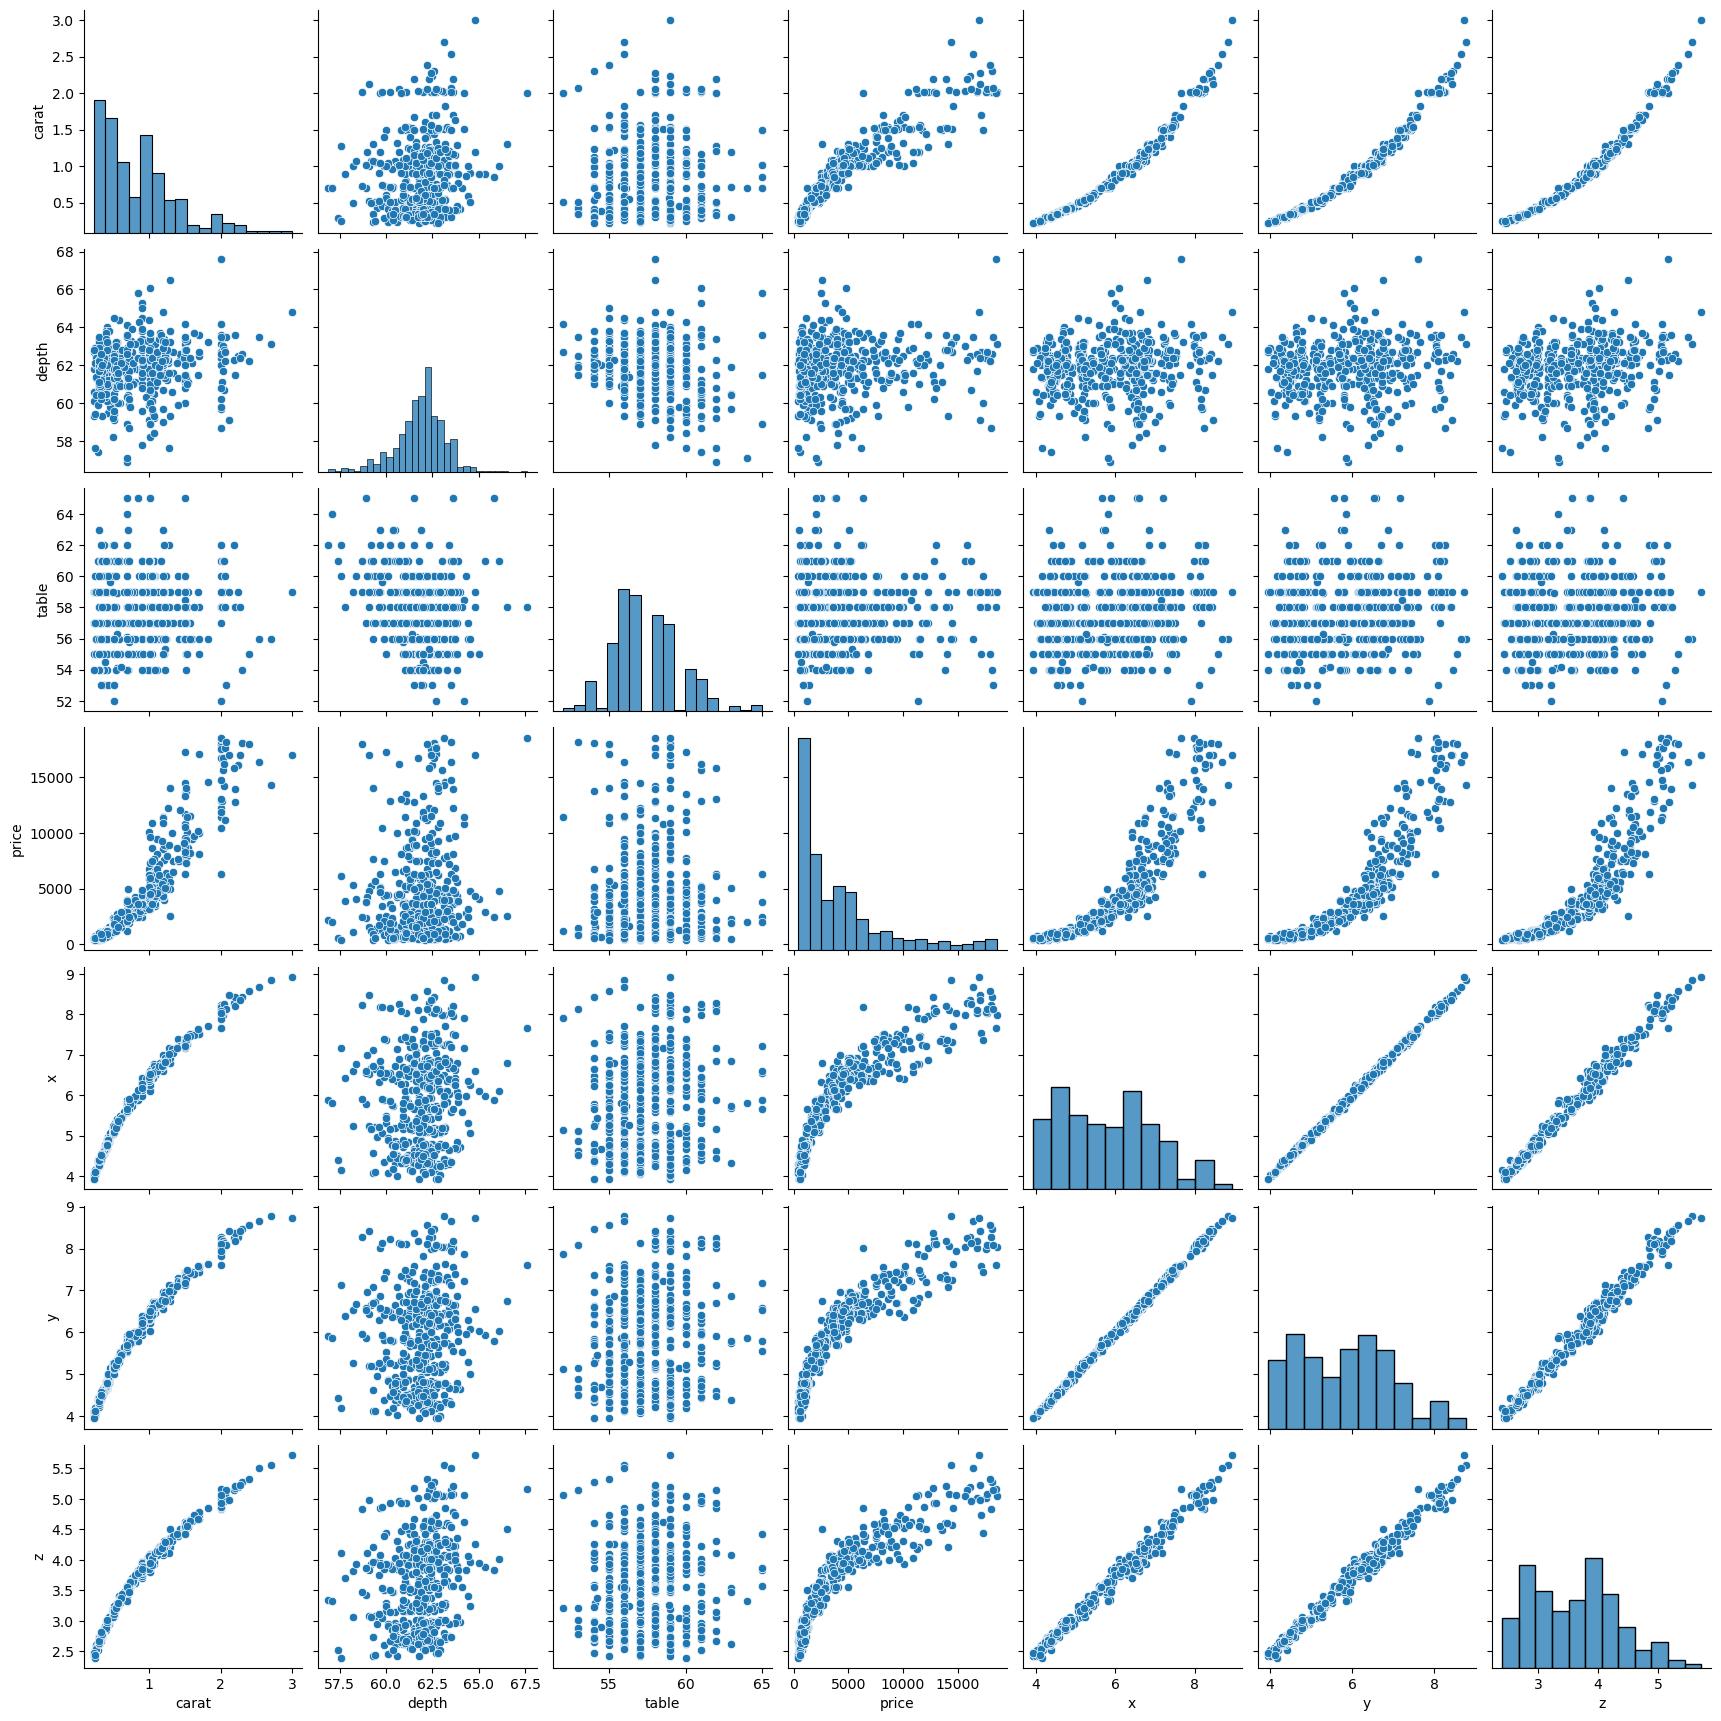

In [7]:
sns.pairplot(diamonds.sample(500))
plt.show()

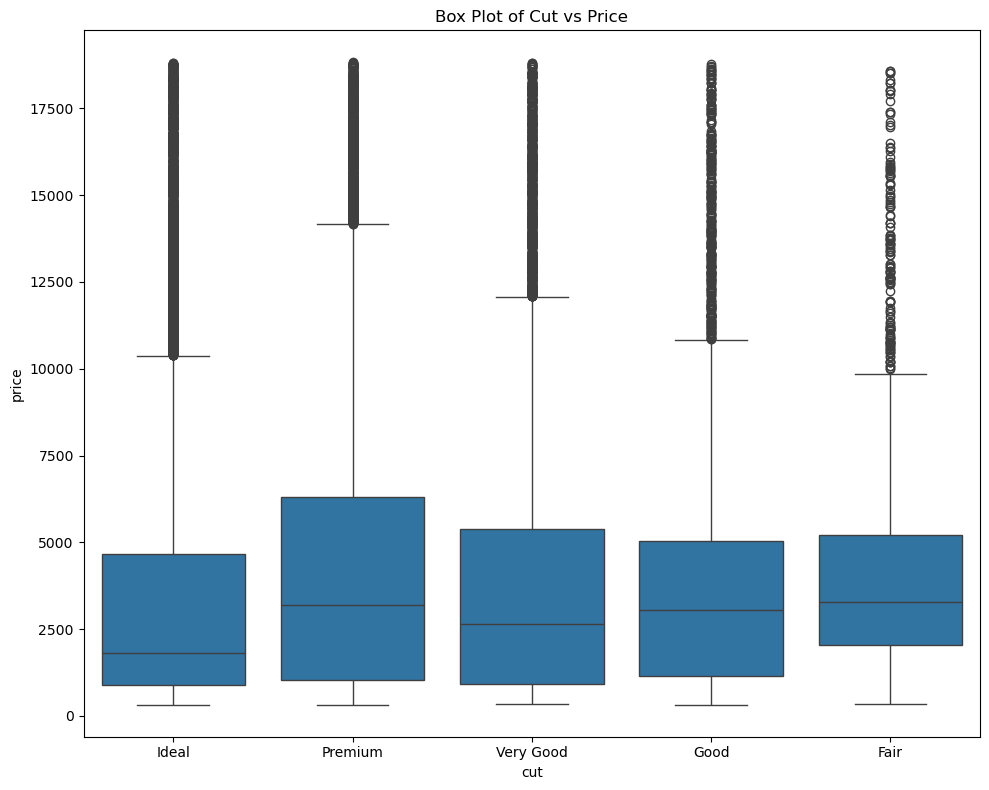

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Box Plot of Cut vs Price')
plt.tight_layout()
plt.show()

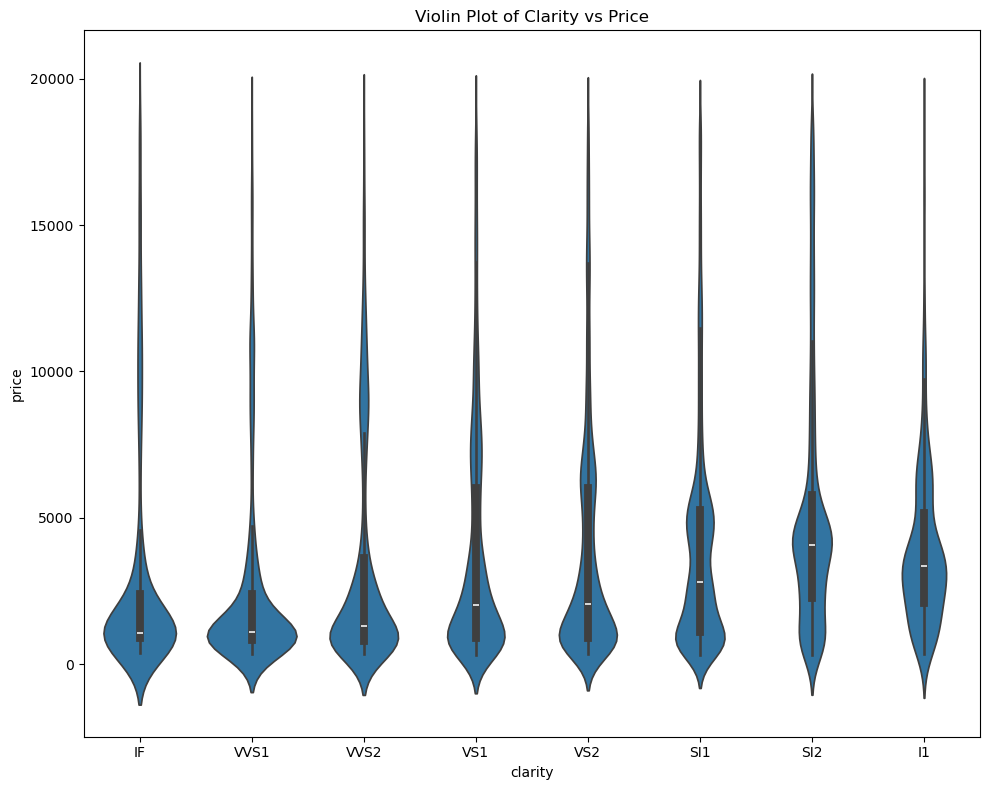

In [11]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='clarity', y='price', data=diamonds)
plt.title('Violin Plot of Clarity vs Price')
plt.tight_layout()
plt.show()

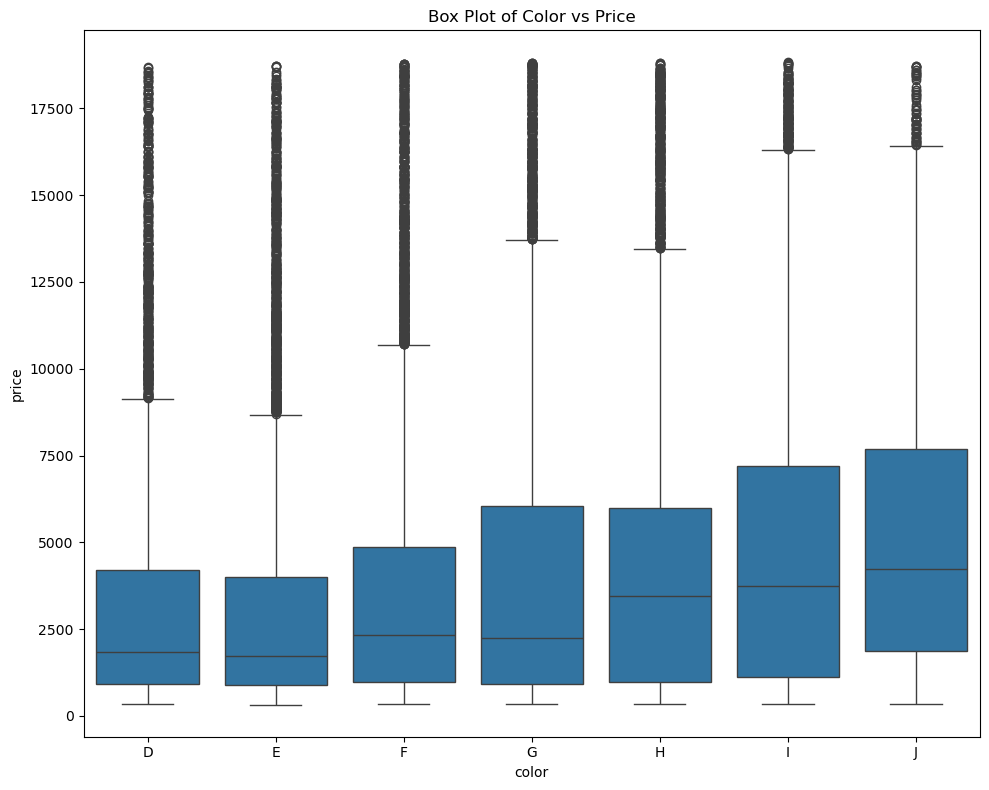

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='color', y='price', data=diamonds)
plt.title('Box Plot of Color vs Price')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
numeric_columns = diamonds.select_dtypes(include=['number']).columns
diamonds_numeric = diamonds[numeric_columns]
scaler = StandardScaler()
scaled_diamonds = pd.DataFrame(scaler.fit_transform(diamonds_numeric), columns=diamonds_numeric.columns)
print(scaled_diamonds.head())

      carat     depth     table     price         x         y         z
0 -1.198168 -0.174092 -1.099672 -0.904095 -1.587837 -1.536196 -1.571129
1 -1.240361 -1.360738  1.585529 -0.904095 -1.641325 -1.658774 -1.741175
2 -1.198168 -3.385019  3.375663 -0.903844 -1.498691 -1.457395 -1.741175
3 -1.071587  0.454133  0.242928 -0.902090 -1.364971 -1.317305 -1.287720
4 -1.029394  1.082358  0.242928 -0.901839 -1.240167 -1.212238 -1.117674


In [21]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = scaled_diamonds.drop('price', axis=1)
y = scaled_diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [39]:
from sklearn.svm import SVR

In [41]:
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error

In [49]:
hybrid_pred = (lr_pred + dt_pred) / 2

In [51]:
print('Linear Regression MSE:', mean_squared_error(y_test, lr_pred))
print('Decision Tree Regressor MSE:', mean_squared_error(y_test, dt_pred))
print('Random Forest Regressor MSE:', mean_squared_error(y_test, rf_pred))
print('Support Vector Regressor MSE:', mean_squared_error(y_test, svr_pred))
print('K-Nearest Neighbors Regressor MSE:', mean_squared_error(y_test, knn_pred))
print('Hybrid Model MSE:', mean_squared_error(y_test, hybrid_pred))

Linear Regression MSE: 0.14088167128664528
Decision Tree Regressor MSE: 0.2237877594458929
Random Forest Regressor MSE: 0.11956868236473295
Support Vector Regressor MSE: 0.11704341648387527
K-Nearest Neighbors Regressor MSE: 0.13162012398966952
Hybrid Model MSE: 0.14377806590734685


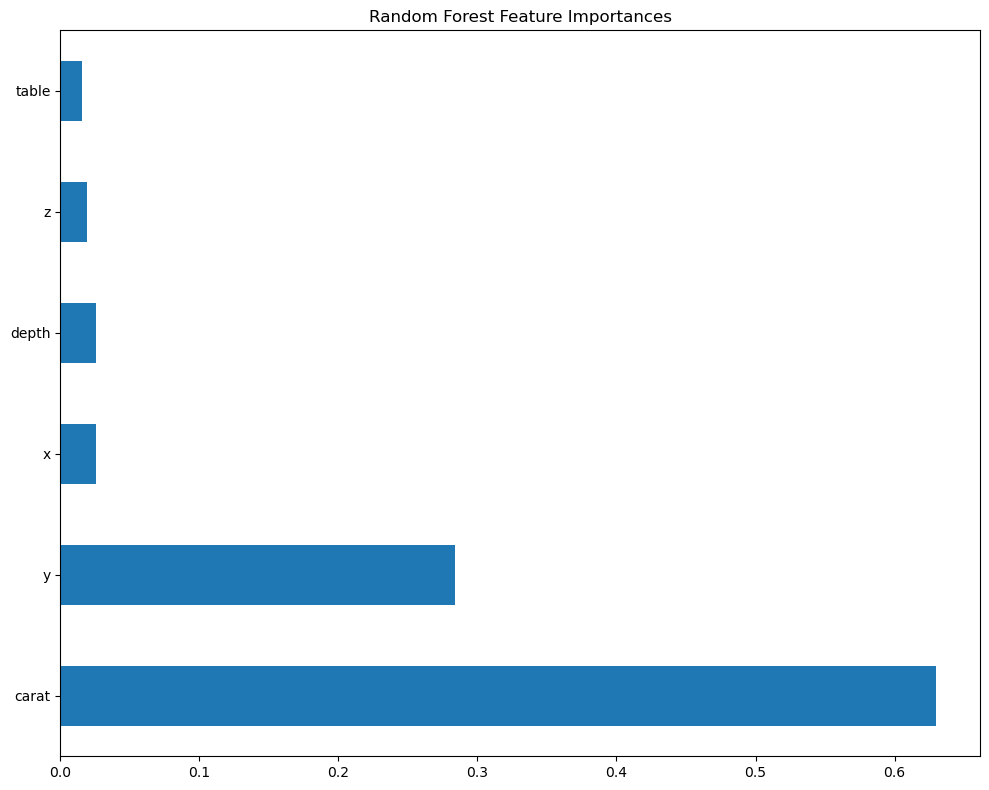

In [53]:
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

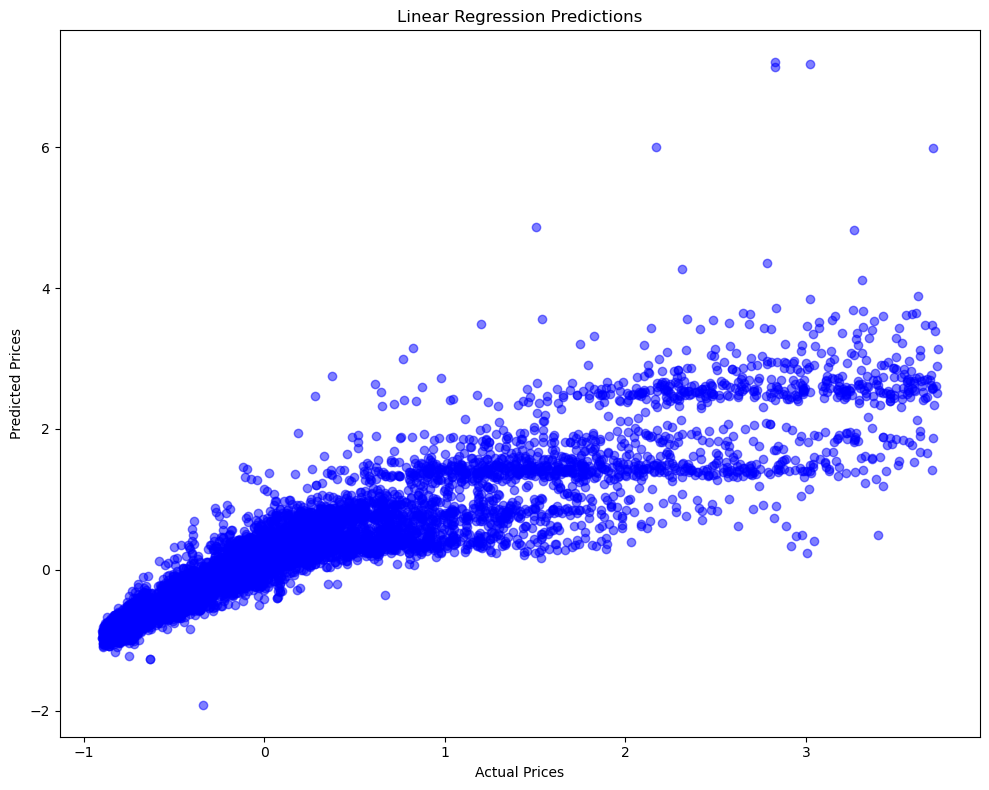

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Predictions')
plt.tight_layout()
plt.show()

C:\Users\marreddyGowthamreddy\AppData\Local\Temp\ipykernel_12880\1408081046.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=errors, palette='viridis')


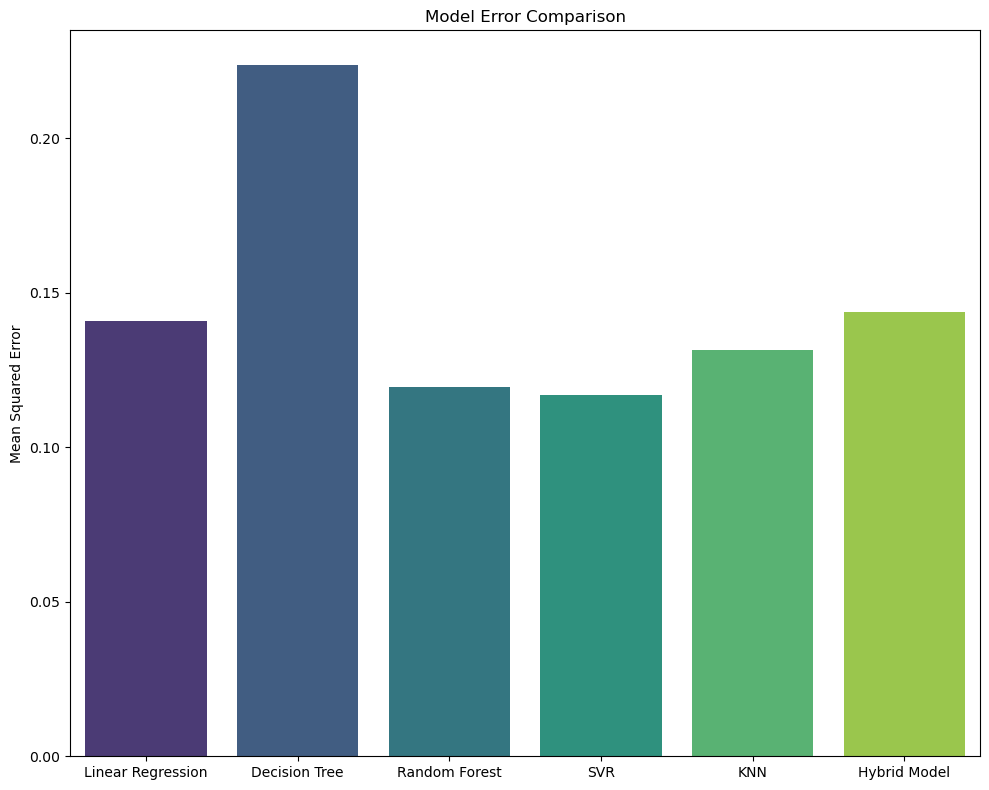

In [57]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'Hybrid Model']
errors = [
    mean_squared_error(y_test, lr_pred),
    mean_squared_error(y_test, dt_pred),
    mean_squared_error(y_test, rf_pred),
    mean_squared_error(y_test, svr_pred),
    mean_squared_error(y_test, knn_pred),
    mean_squared_error(y_test, hybrid_pred)
]
plt.figure(figsize=(10, 8))
sns.barplot(x=models, y=errors, palette='viridis')
plt.ylabel('Mean Squared Error')
plt.title('Model Error Comparison')
plt.tight_layout()
plt.show()